## Dataset ===>> https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("./../data/raw/Twitter US Airline Sentiment/Tweets.csv")

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
#checking columns in our data
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
#checking info our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
#checking unique values 
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

## Preprocessing on data

In [7]:
data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.date

In [8]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

In [10]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)


In [11]:
data['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

In [12]:
data['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

In [13]:
#checking uniques values in tweet_created columns
data['tweet_created'].nunique()

9

In [14]:
numberoftweets = data.groupby('tweet_created').size()

In [15]:
numberoftweets.dtype

dtype('int64')

In [16]:
numberoftweets

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

In [17]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [18]:
print("Percentage of null or NaN values in df:")
missing_percentage = (data.isnull().mean() * 100).round(2)
print(missing_percentage)

Percentage of null or NaN values in df:
tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64


In [19]:
columns_to_drop = ['tweet_coord', 'airline_sentiment_gold', 'negativereason_gold']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


In [20]:
freq = data.groupby('negativereason').size()
freq

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
dtype: int64

## Exploratory Data Anylasis

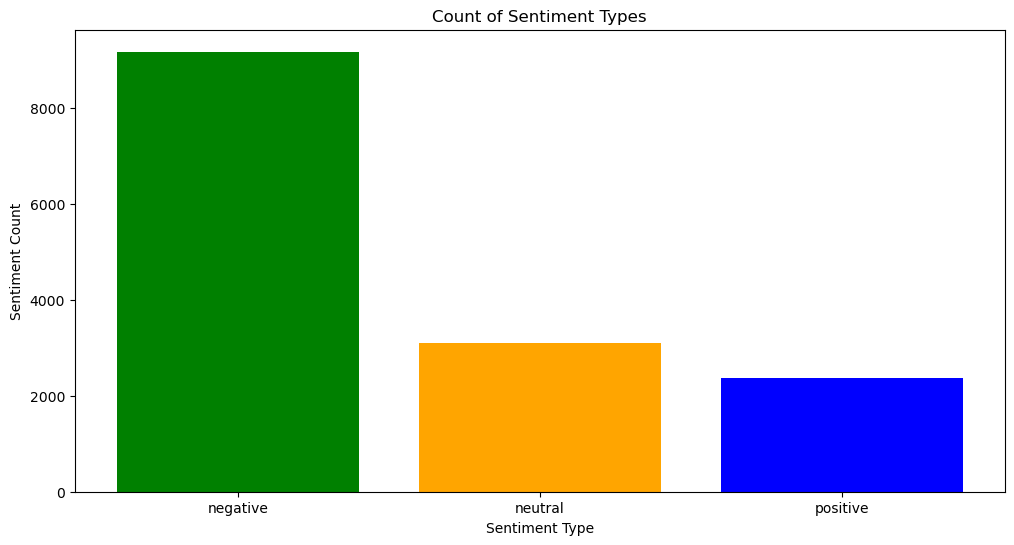

In [21]:
# Count sentiment values
counter = data['airline_sentiment'].value_counts()

# Extract sentiment labels and counts dynamically
labels = counter.index
counts = counter.values

# Plot
plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color=['green', 'orange', 'blue'])

# Labels and title
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Sentiment Types')

plt.show()


In [22]:
#checking differtent airlines we have
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

Total number of tweets for each airline:
 airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


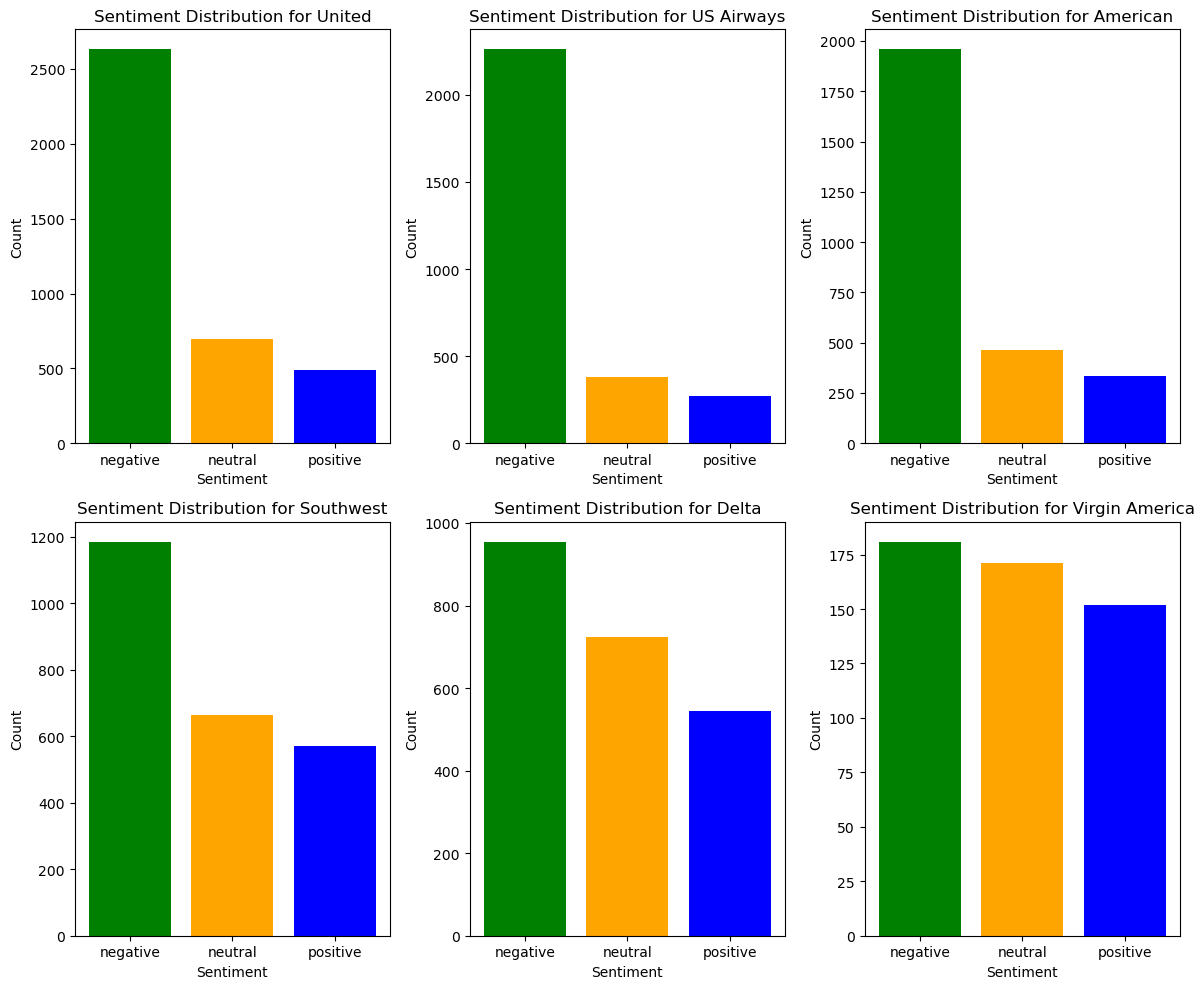

In [23]:
# Display total number of tweets for each airline
airline_tweet_counts = data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False)
print("Total number of tweets for each airline:\n", airline_tweet_counts)

# Define airline list dynamically from the dataset instead of hardcoding
airlines = airline_tweet_counts.index.tolist()

# Set up the figure
plt.figure(figsize=(12, 10))

# Loop through each airline and create subplots
for idx, airline in enumerate(airlines, start=1):
    plt.subplot(2, 3, idx)
    sentiment_counts = data[data['airline'] == airline]['airline_sentiment'].value_counts()

    # Extract labels and counts dynamically
    labels = sentiment_counts.index
    counts = sentiment_counts.values

    # Plot bar chart
    plt.bar(labels, counts, color=['green', 'orange', 'blue'])

    # Set labels and title
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title(f'Sentiment Distribution for {airline}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


                Percent Negative
airline                         
American                0.710402
Delta                   0.429793
Southwest               0.490083
US Airways              0.776862
United                  0.688906
Virgin America          0.359127


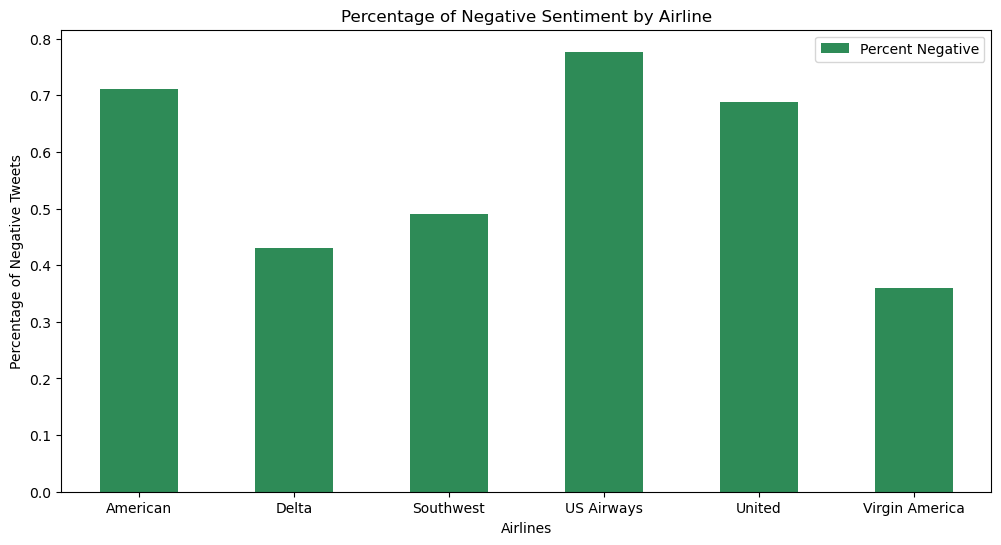

In [24]:
# Group data to count negative tweets and total tweets per airline
neg_tweets = data[data['airline_sentiment'] == 'negative'].groupby('airline').size()
total_tweets = data.groupby('airline')['airline_sentiment'].count()

# Calculate the percentage of negative tweets
perc = (neg_tweets / total_tweets).to_frame(name='Percent Negative')

# Print the percentage dataframe
print(perc)

# Plot the data
ax = perc.plot(kind='bar', rot=0, color='#2E8B57', figsize=(12, 6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of Negative Tweets')
ax.set_title('Percentage of Negative Sentiment by Airline')

# Display the plot
plt.show()


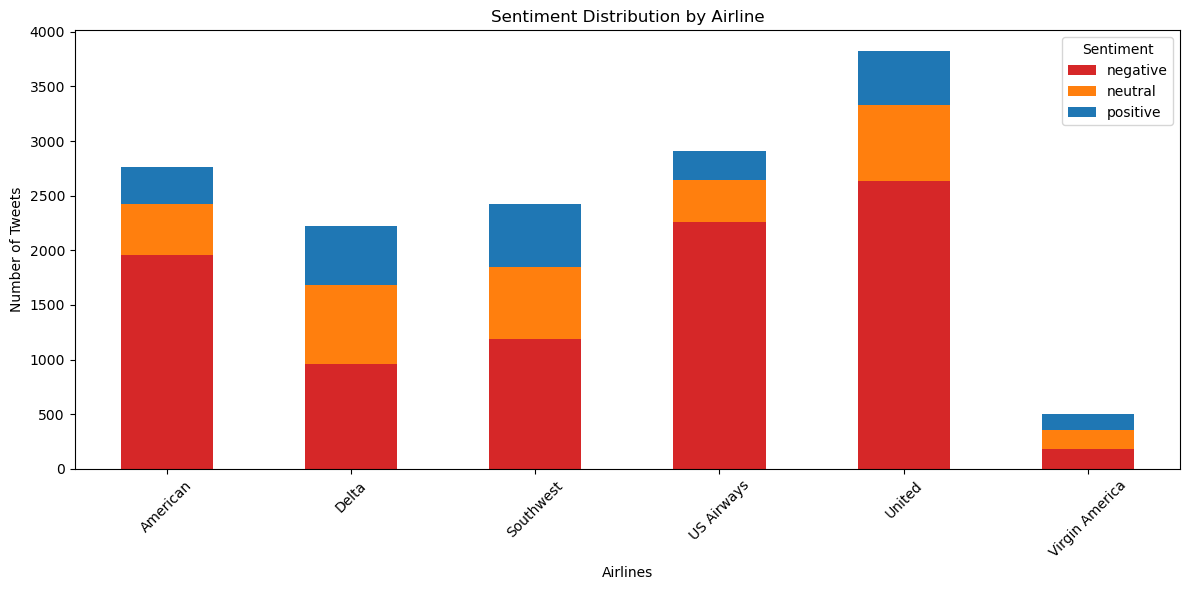

In [25]:
# Group data by airline and sentiment, then count occurrences
sentiment_counts = data.groupby(['airline', 'airline_sentiment']).size().unstack()

# Plot stacked bar chart
ax = sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#D62728', '#FF7F0E', '#1F77B4'])

# Labels and title
ax.set_xlabel('Airlines')
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment Distribution by Airline')
ax.legend(title='Sentiment')

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
print(sentiment_counts)

airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152


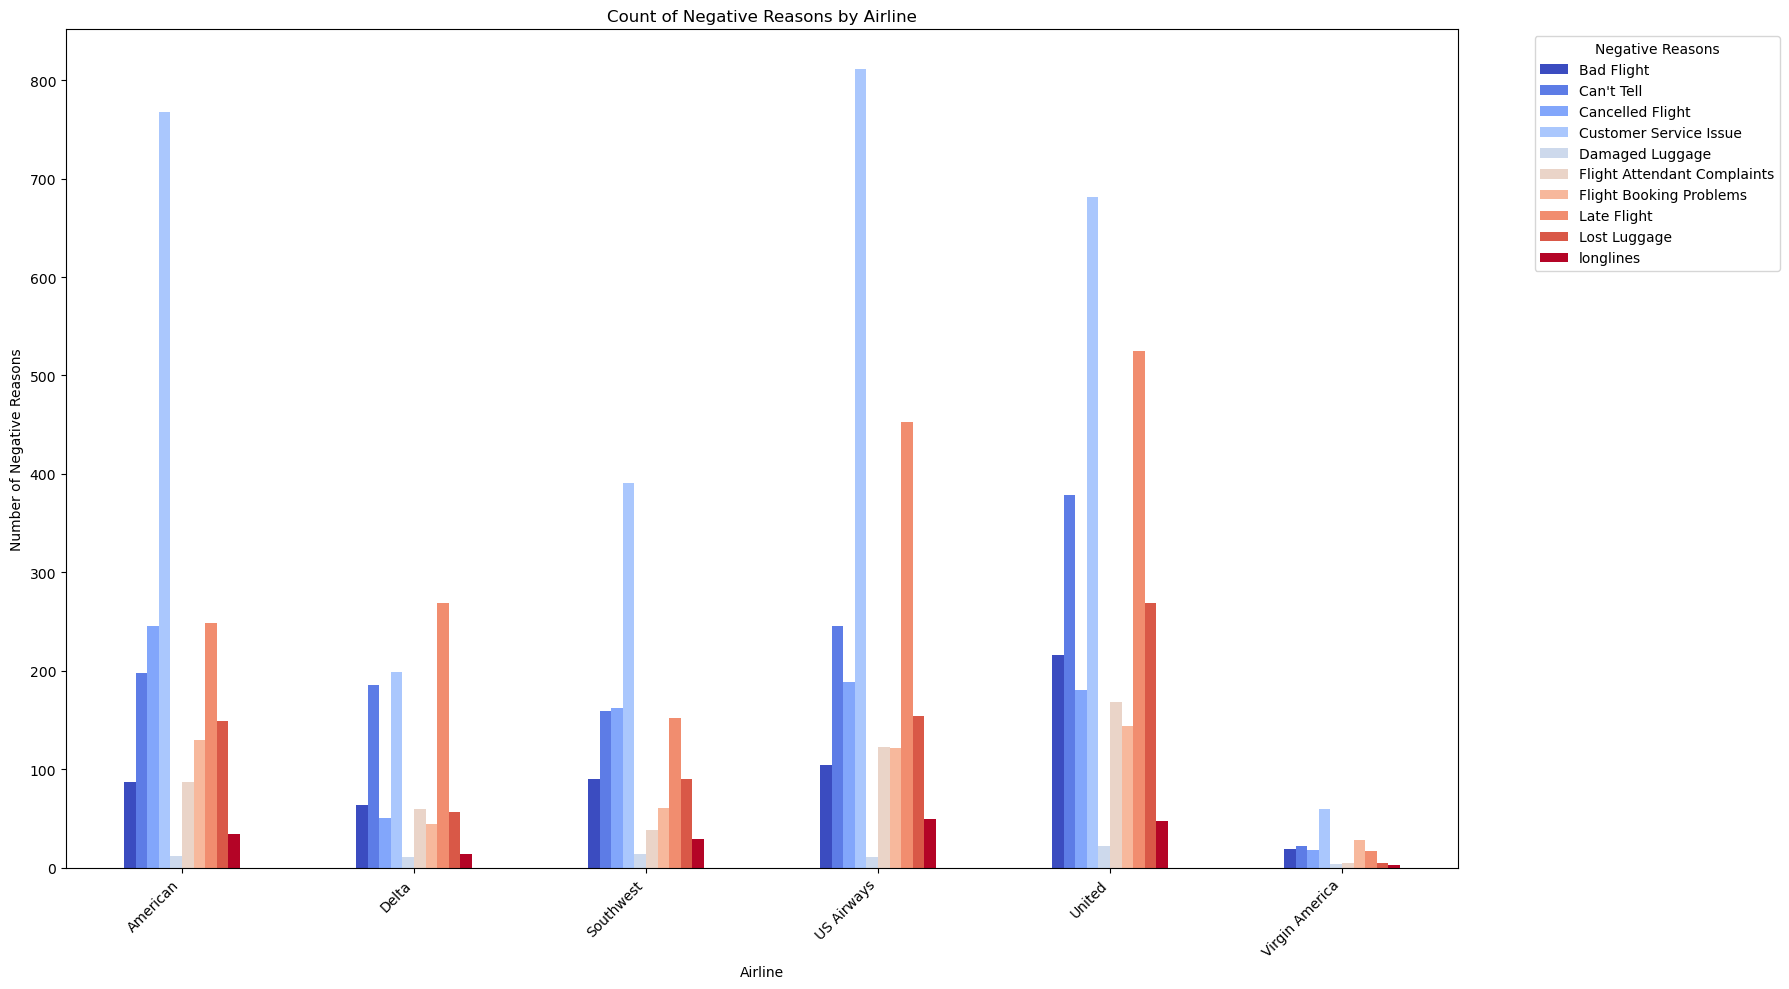

In [27]:
# Group data by airline and negative reason, then count occurrences
negative_reasons = data.groupby(['airline', 'negativereason']).size().unstack()

# Plot stacked bar chart for negative reasons per airline
ax = negative_reasons.plot(kind='bar', figsize=(18, 10), colormap='coolwarm')

# Labels and title
ax.set_xlabel('Airline')
ax.set_ylabel('Number of Negative Reasons')
ax.set_title('Count of Negative Reasons by Airline')
ax.legend(title='Negative Reasons', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout for better spacing and readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### What are the reasons for negative sentimental tweets for each airline ?

Number of unique negative reasons: 10


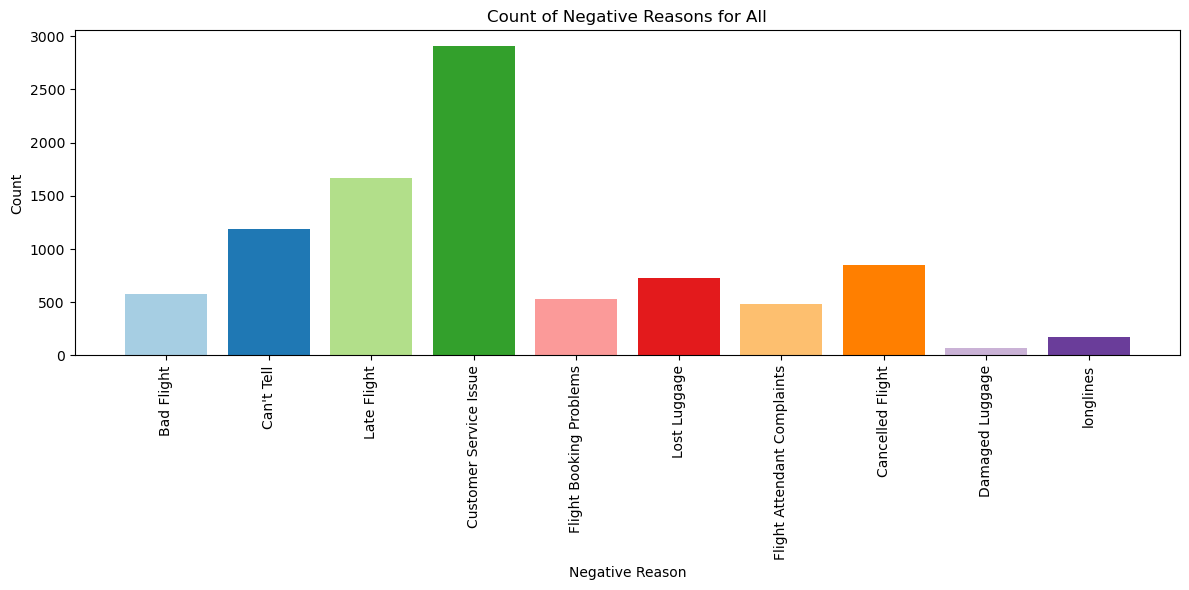

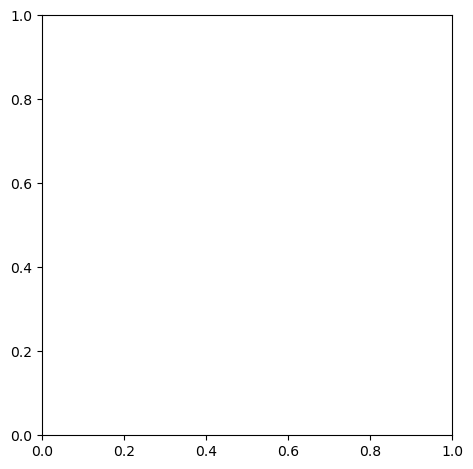

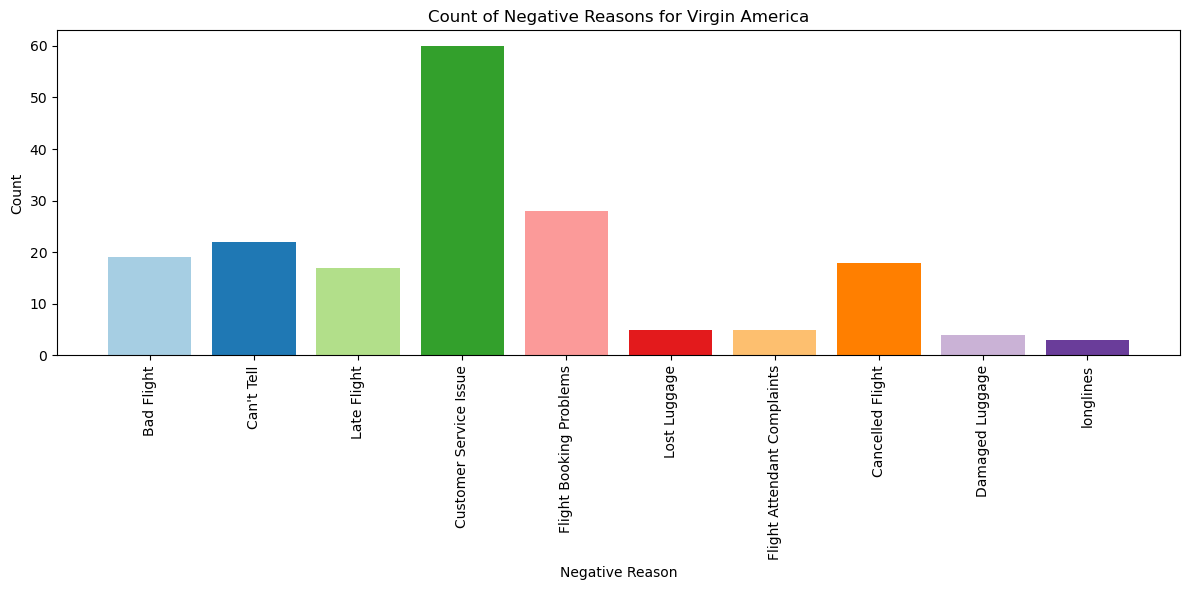

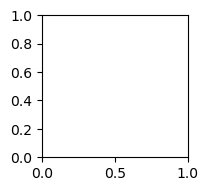

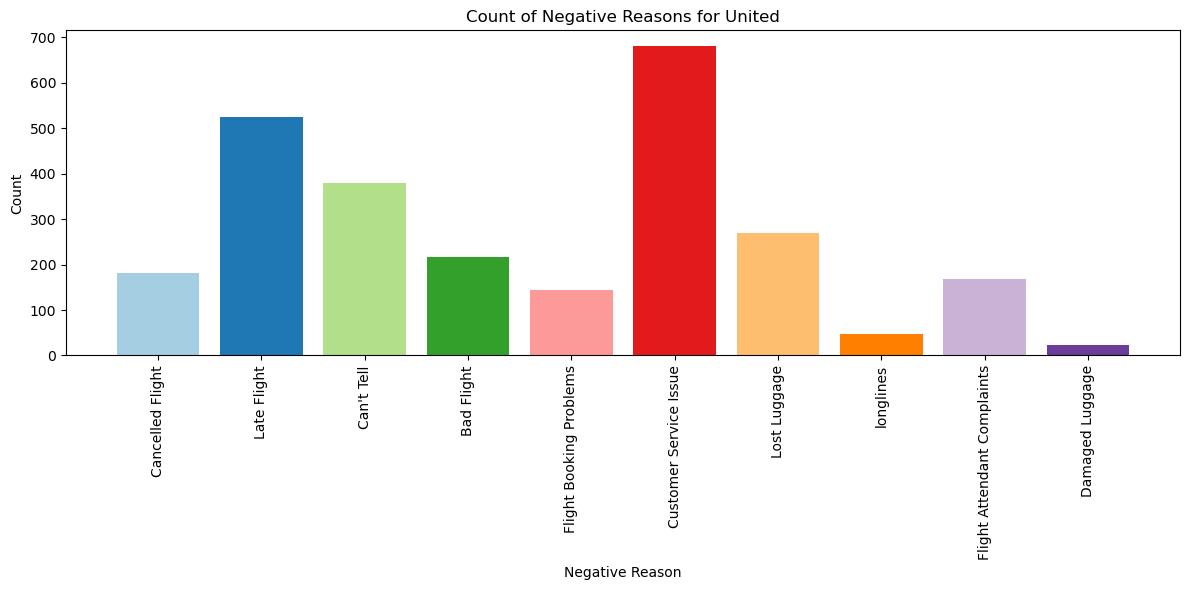

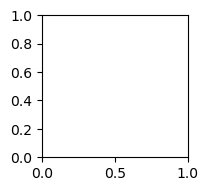

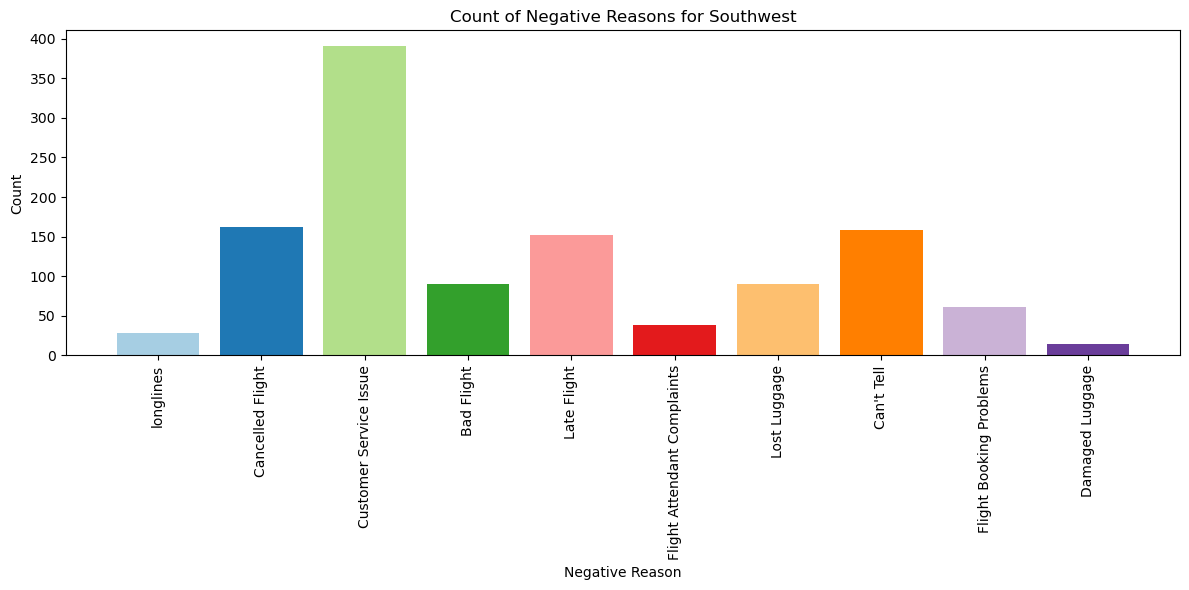

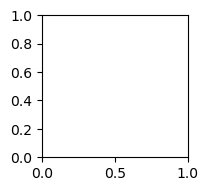

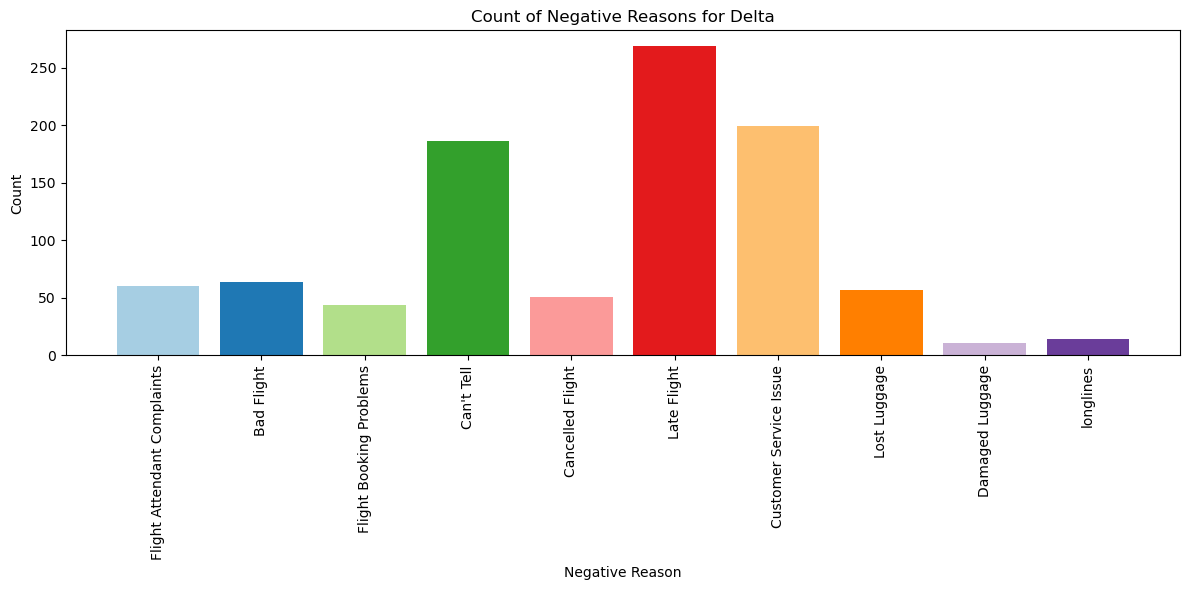

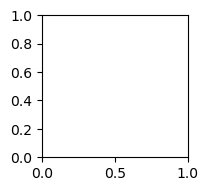

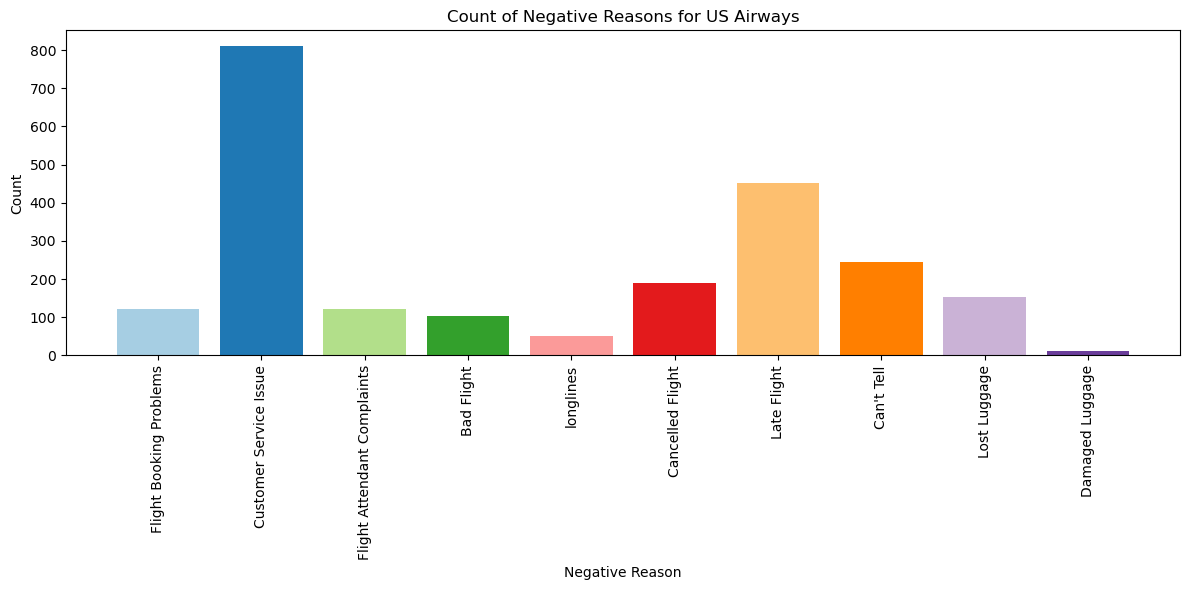

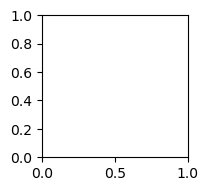

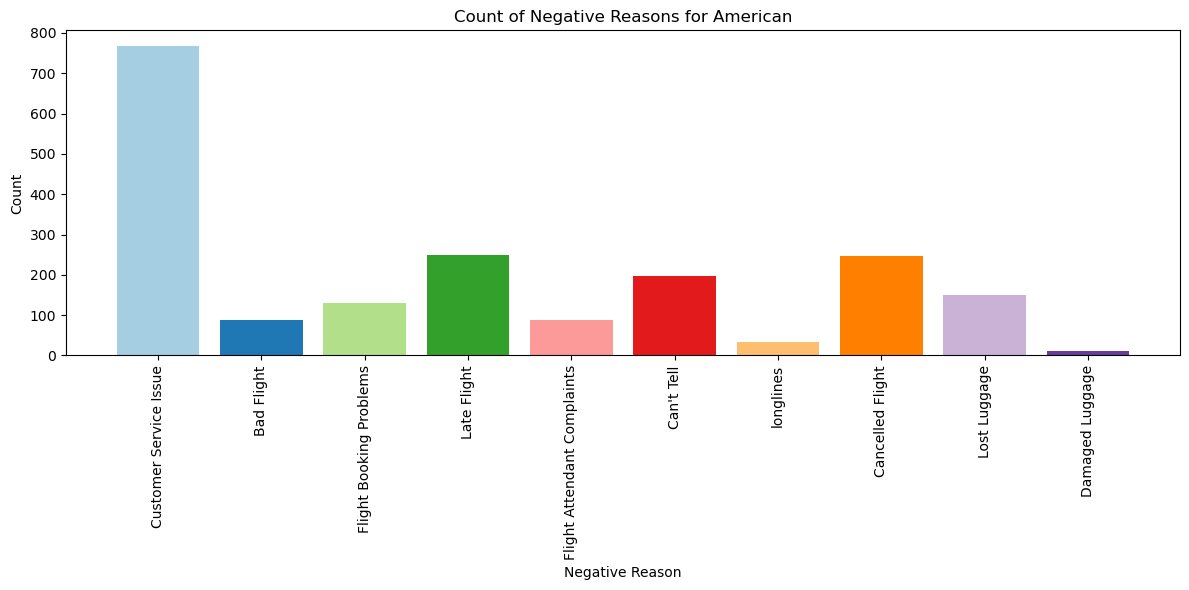

<Figure size 640x480 with 0 Axes>

In [28]:
# Get the number of unique negative reasons
num_unique_reasons = data['negativereason'].nunique()
print(f"Number of unique negative reasons: {num_unique_reasons}")

# Function to count negative reasons per airline
def get_negative_reasons_count(airline='All'):
    # Filter data based on airline
    if airline == 'All':
        df = data
    else:
        df = data[data['airline'] == airline]
    
    # Count occurrences of each reason
    count = df['negativereason'].value_counts()
    
    # Create DataFrame with reasons and their counts
    unique_reasons = [reason for reason in df['negativereason'].unique() if str(reason) != 'nan']
    reason_frame = pd.DataFrame({'Reason': unique_reasons})
    reason_frame['Count'] = reason_frame['Reason'].apply(lambda x: count.get(x, 0))
    
    return reason_frame

# Function to plot negative reasons
def plot_negative_reasons(airline='All'):
    reason_frame = get_negative_reasons_count(airline)
    
    # Define the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(reason_frame['Reason'], reason_frame['Count'], color=plt.cm.Paired.colors)  # Professional color palette
    
    # Set labels and title
    ax.set_xlabel('Negative Reason')
    ax.set_ylabel('Count')
    ax.set_title(f'Count of Negative Reasons for {airline}')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

# Plot for all airlines
plot_negative_reasons('All')

# Plot for individual airlines
airlines = data['airline'].unique()
plt.figure(figsize=(18, 12))

# Create subplots for each airline
for idx, airline in enumerate(airlines, start=1):
    plt.subplot(2, 3, idx)
    plot_negative_reasons(airline)
    plt.subplots_adjust(hspace=0.6)  # Adjust spacing between subplots

plt.show()


### Is there a relationship between negative sentiments and date?

In [29]:
# Reset index and convert 'tweet_created' column to datetime format
date = data.reset_index()
date['tweet_created'] = pd.to_datetime(date['tweet_created']).dt.date  # Directly convert to date

# Group by 'tweet_created', 'airline', and 'airline_sentiment' and get the count
day_df = date.groupby(['tweet_created', 'airline', 'airline_sentiment']).size().reset_index(name='count')

# Display the grouped DataFrame
day_df.head()


,tweet_created,airline,airline_sentiment,count
0,2015-02-16,Delta,negative,1
1,2015-02-16,Delta,neutral,1
2,2015-02-16,United,negative,2
3,2015-02-17,Delta,negative,108
4,2015-02-17,Delta,neutral,86


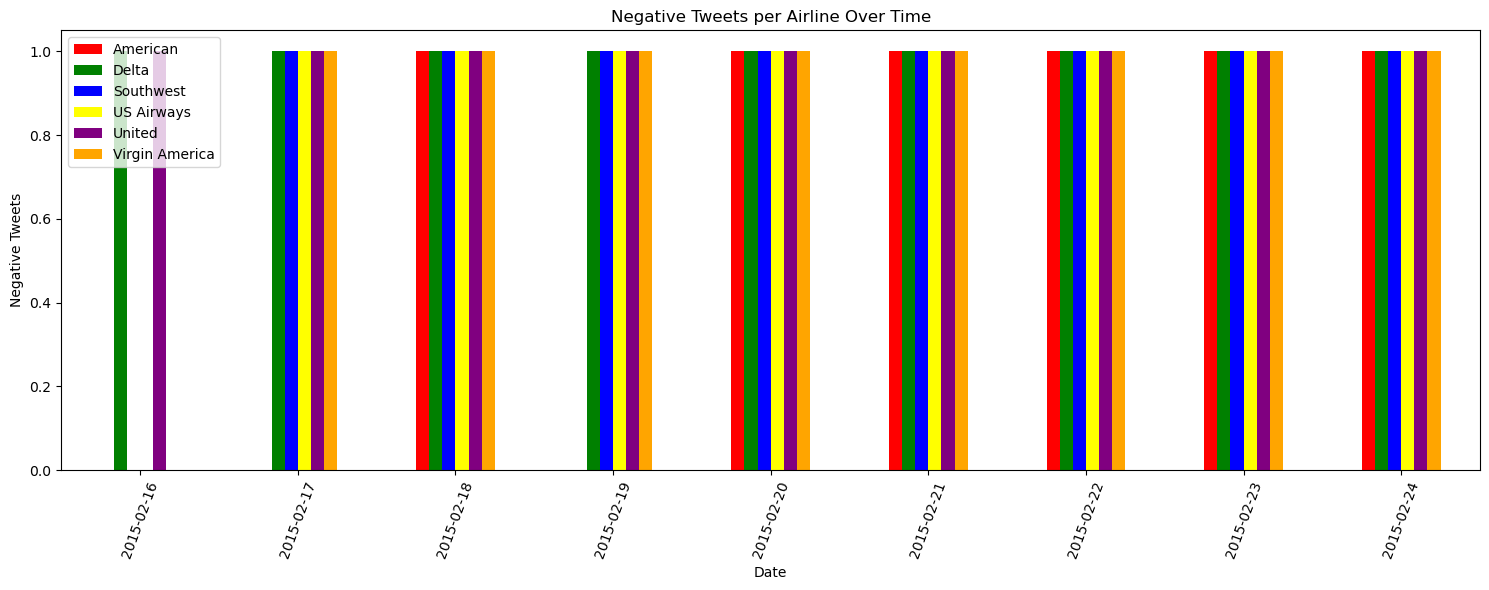

In [30]:
# Ensure that the index of 'day_df' is a MultiIndex with 'tweet_created' and 'airline_sentiment' as levels
if not isinstance(day_df.index, pd.MultiIndex):
    day_df = day_df.set_index(['tweet_created', 'airline_sentiment'])

# Filter negative sentiment tweets (only 'negative' sentiment)
negative_df = day_df.xs('negative', level='airline_sentiment')

# Group by 'tweet_created' and 'airline', then sum the values
grouped_data = negative_df.groupby(['tweet_created', 'airline']).size().unstack()

# Plot the data
ax2 = grouped_data.plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple', 'orange'], figsize=(15, 6), rot=70)

# Labels and title
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
ax2.set_title('Negative Tweets per Airline Over Time')

# Legend and plot adjustments
labels = ['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America']
ax2.legend(labels=labels)

# Show the plot
plt.tight_layout()
plt.show()


### Wordcloud for positive reasons

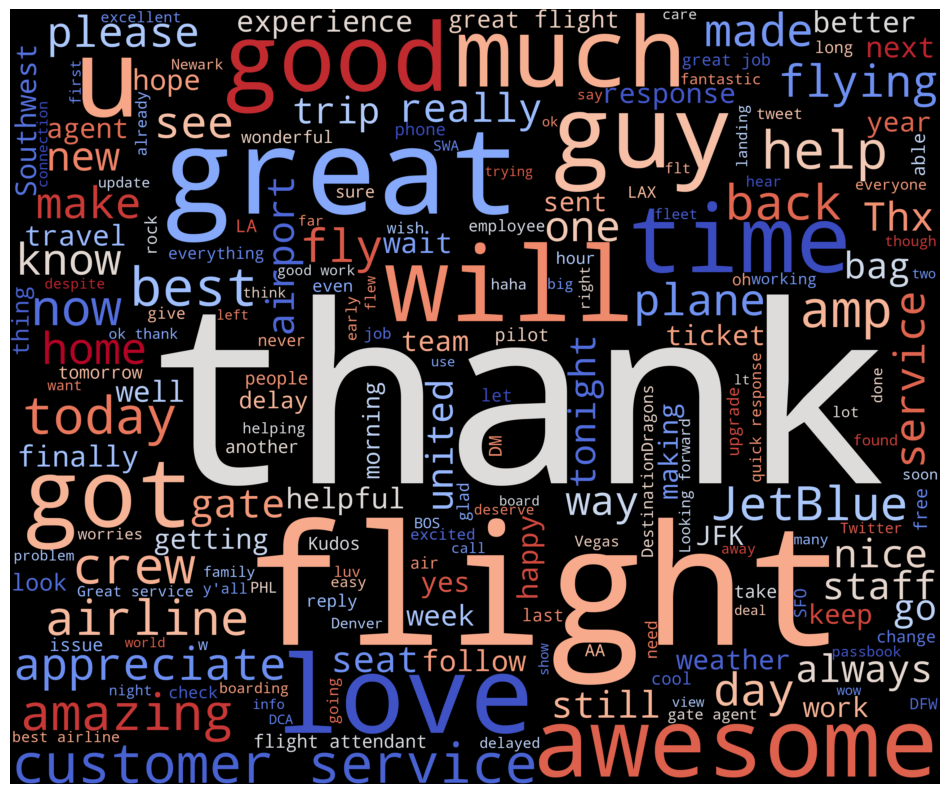

In [31]:
from wordcloud import WordCloud, STOPWORDS

# Filter positive sentiment tweets
positive_tweets = data[data['airline_sentiment'] == 'positive']

# Join all tweet texts into one large string and clean it
text = ' '.join(positive_tweets['text'])
cleaned_text = " ".join([word for word in text.split() 
                         if 'http' not in word and not word.startswith('@') and word != 'RT'])

# Generate WordCloud
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=3000,
    height=2500,
    colormap='coolwarm'  # You can change colormap for different color schemes
).generate(cleaned_text)

# Plot the wordcloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


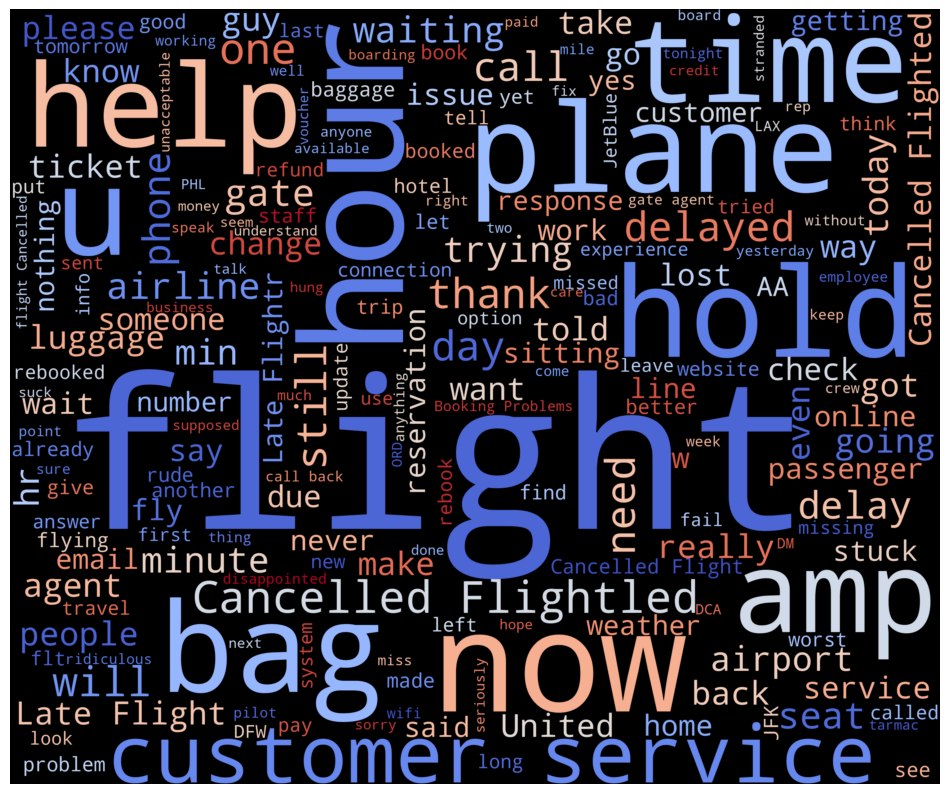

In [32]:
# Filter negative sentiment tweets
negative_tweets = data[data['airline_sentiment'] == 'negative']

# Join all tweet texts into one large string and clean it
text = ' '.join(negative_tweets['text'])
cleaned_text = " ".join([word for word in text.split() 
                         if 'http' not in word and not word.startswith('@') and word != 'RT'])

# Generate WordCloud
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=3000,
    height=2500,
    colormap='coolwarm'  # Optional: Adjust colormap for aesthetic purposes
).generate(cleaned_text)

# Plot the wordcloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


In [33]:
data.drop(data.loc[data['airline_sentiment']=='neutral'].index, inplace=True)

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['airline_sentiment'])

data['airline_sentiment_encoded'] = le.transform(data['airline_sentiment'])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,airline_sentiment_encoded
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),0
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),0
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),1


In [35]:
# Preprocessing the tweet text data

import re
import nltk
from nltk.corpus import stopwords
import string

# Ensure NLTK stopwords are downloaded only once
if not nltk.data.find('corpora/stopwords'):
    nltk.download('stopwords')

# Define the tweet to words cleaning function
def tweet_to_words(tweet):
    # Remove non-alphabetic characters and convert to lowercase
    tweet = re.sub(f"[^{string.ascii_letters}]", " ", tweet).lower()
    
    # Split tweet into words and remove stopwords
    words = tweet.split()
    stop_words = set(stopwords.words("english"))
    meaningful_words = [word for word in words if word not in stop_words]
    
    # Join the list back into a single string and return
    return " ".join(meaningful_words)

# Apply the function to the 'text' column to create a 'clean_tweet' column
data['clean_tweet'] = data['text'].map(tweet_to_words)


In [36]:
x = data.clean_tweet
y = data.airline_sentiment

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [39]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [40]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

## Model Building

In [41]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Scaling the features for SVM (SVMs are sensitive to feature scaling)
scaler = StandardScaler(with_mean=False)  # Set with_mean=False for sparse matrices
x_train_scaled = scaler.fit_transform(x_train_dtm)
x_test_scaled = scaler.transform(x_test_dtm)

# Initialize the model with a linear kernel
model = SVC(kernel='linear', random_state=10)

# Hyperparameter tuning using GridSearchCV (optional, but highly recommended)
param_grid = {'C': [0.1, 1, 10, 100]}  # Regularization parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train_scaled, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predicting on test data using the best model
predictions = best_model.predict(x_test_scaled)

# Accuracy score of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Cross-validation scores (optional, to check generalization)
cv_scores = cross_val_score(best_model, x_train_scaled, y_train, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Accuracy: 87.60%
Cross-validation accuracy: 86.67%
Confusion Matrix:
[[2105  218]
 [ 140  423]]


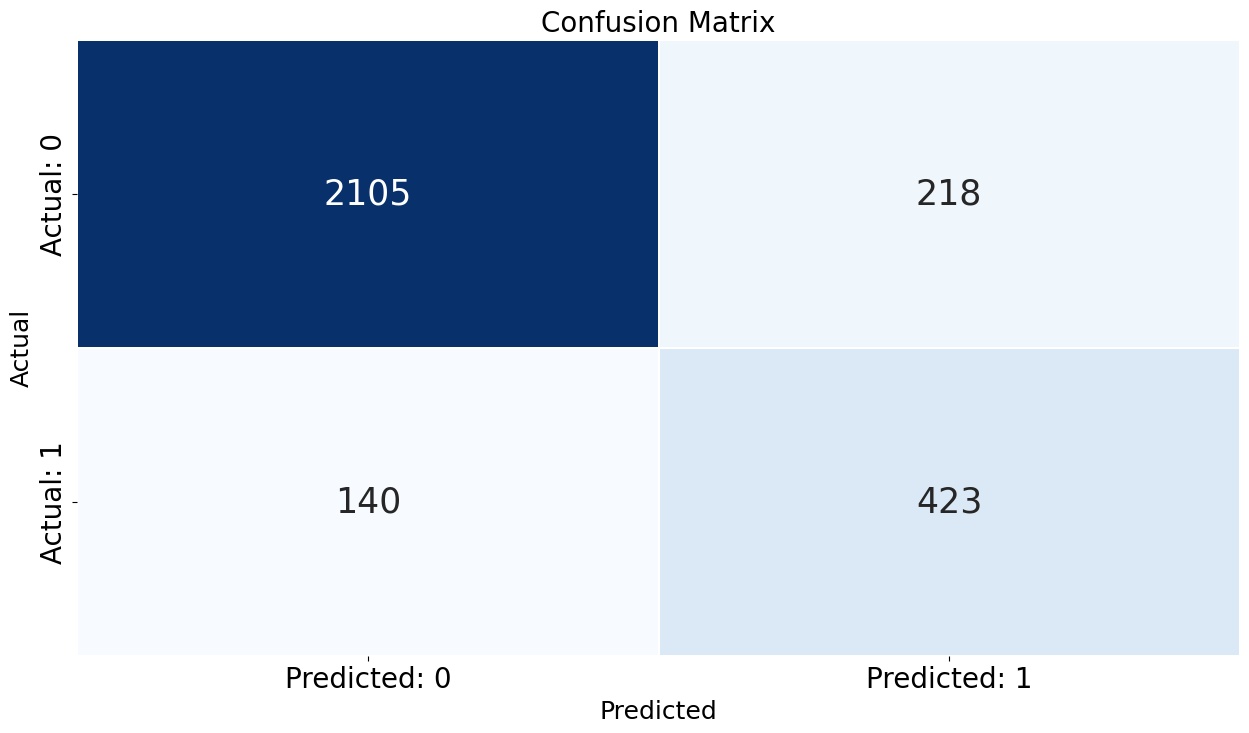

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names, figsize=(15,8), annot_size=25, tick_size=20):
    """
    Plots the confusion matrix with customizable features.
    """
    # Convert confusion matrix to DataFrame for better labeling
    cm_df = pd.DataFrame(cm, index=[f'Actual: {cls}' for cls in class_names], 
                         columns=[f'Predicted: {cls}' for cls in class_names])
    
    # Set the figure size
    plt.figure(figsize=figsize)
    
    # Plot the heatmap
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, 
                linewidths=0.1, annot_kws={'size': annot_size})
    
    # Customize ticks
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    
    # Title and labels
    plt.title("Confusion Matrix", fontsize=20)
    plt.ylabel('Actual', fontsize=18)
    plt.xlabel('Predicted', fontsize=18)
    
    # Show the plot
    plt.show()

# Example usage
cm = confusion_matrix(y_test, predictions)  # Use your actual model's predictions here
class_names = ['0', '1']  # Modify this list as per your classification problem (e.g., multi-class)

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, class_names)
